<a href="https://colab.research.google.com/github/vanadnarayane26/Customer-Attrition-KDAG-Competition/blob/main/Customer_Attrition_Prediction(The_Aggregators).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
!gdown https://drive.google.com/uc?id=1M_dGd1LUBVFf_YbRICQacFtNqVxlpYoe

Downloading...
From: https://drive.google.com/uc?id=1M_dGd1LUBVFf_YbRICQacFtNqVxlpYoe
To: /content/customerattritionprediction.zip
100% 280k/280k [00:00<00:00, 40.6MB/s]


In [ ]:
!unzip /content/customerattritionprediction.zip

Archive:  /content/customerattritionprediction.zip
  inflating: Sample Submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No
2,DZ9EEOQWSN0MYCBUPAM5,Male,Yes,Yes,No,59,Yes,Wifi Broadband,Yes,No,Yes,No,Card,106.016057,6205.891129,Yes
3,YZ43L1UQUQACTL1PXXZG,Male,No,No,No,14,Yes,Wifi Broadband,No,No,No,No,Check,80.108839,1248.655391,No
4,6P28152QGF60PDLSCB9M,Female,No,Yes,Yes,25,Yes,Wifi Broadband,No,Yes,No,Yes,Check,51.529773,1285.321277,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6328 non-null   float64
 15  CustomerAttrition    6338 non-null   o

In [ ]:
df_copy = df.copy()

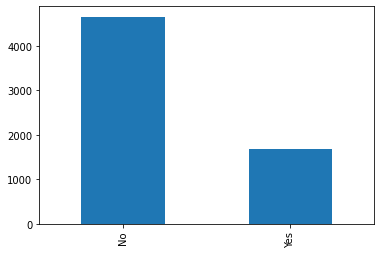

count     6338
unique       2
top         No
freq      4658
Name: CustomerAttrition, dtype: object


In [ ]:
df['CustomerAttrition'].value_counts().plot.bar()#Imbalanced Data
plt.show()
print(df['CustomerAttrition'].describe())

###Missing values only in Grand payment. Replacement according to the distribution that the feature follows. Most probably mean or median.


In [ ]:
df['sex'].describe()

count     6338
unique       2
top       Male
freq      3213
Name: sex, dtype: object

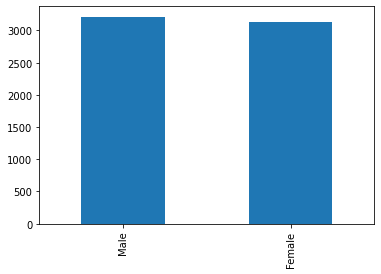

In [ ]:
df['sex'].value_counts().plot.bar()
plt.show()

In [ ]:
df['Aged'].describe()

count     6338
unique       2
top         No
freq      5309
Name: Aged, dtype: object

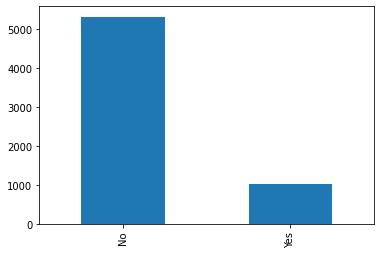

In [ ]:
df['Aged'].value_counts().plot.bar() #imbalanced

In [ ]:
df['Married'].describe()

count     6338
unique       2
top         No
freq      3273
Name: Married, dtype: object

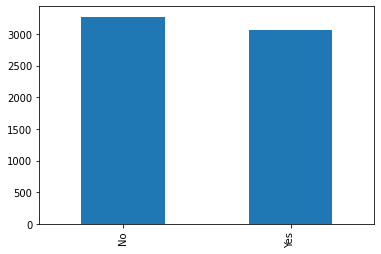

In [ ]:
df['Married'].value_counts().plot.bar()
plt.show()

In [ ]:
df['TotalDependents'].describe()

count     6338
unique       2
top         No
freq      4432
Name: TotalDependents, dtype: object

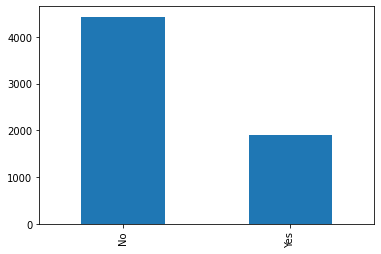

In [ ]:
df['TotalDependents'].value_counts().plot.bar()
plt.show()

In [ ]:
df['ServiceSpan'].describe()

count    6338.000000
mean       31.946040
std        24.559659
min        -2.000000
25%         8.000000
50%        29.000000
75%        55.000000
max        73.000000
Name: ServiceSpan, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


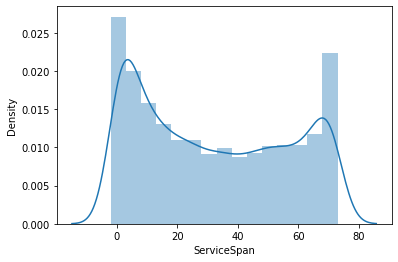

In [ ]:
sns.distplot(df['ServiceSpan'])
plt.show()

In [ ]:
df['MobileService'].describe()

count     6338
unique       2
top        Yes
freq      5772
Name: MobileService, dtype: object

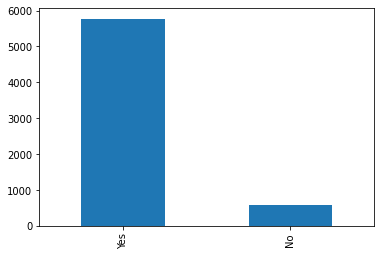

In [ ]:
df['MobileService'].value_counts().plot.bar()#highly Imbalanced
plt.show()

In [ ]:
df['4GService'].describe()

count               6338
unique                 3
top       Wifi Broadband
freq                2794
Name: 4GService, dtype: object

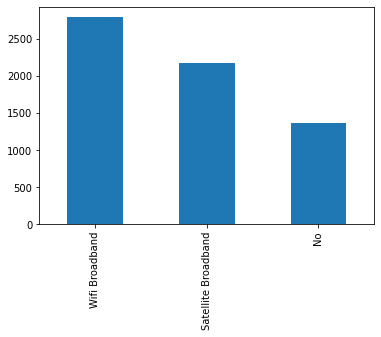

In [ ]:
df['4GService'].value_counts().plot.bar()
plt.show()

In [ ]:
df['CyberProtection'].describe()

count     6338
unique       2
top         No
freq      4508
Name: CyberProtection, dtype: object

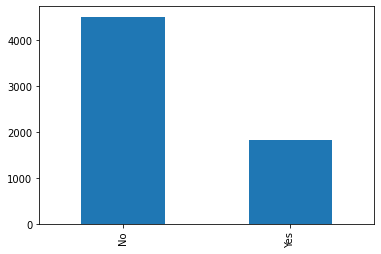

In [ ]:
df['CyberProtection'].value_counts().plot.bar()
plt.show()

In [ ]:
df['HardwareSupport'].describe()

count     6338
unique       2
top         No
freq      4185
Name: HardwareSupport, dtype: object

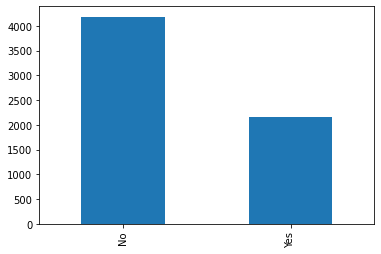

In [ ]:
df['HardwareSupport'].value_counts().plot.bar()
plt.show()

In [ ]:
df['TechnicalAssistance'].describe()

count     6338
unique       2
top         No
freq      4508
Name: TechnicalAssistance, dtype: object

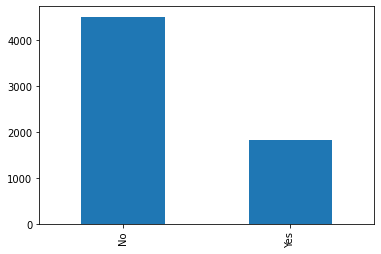

In [ ]:
df['TechnicalAssistance'].value_counts().plot.bar()
plt.show()

In [ ]:
df['FilmSubscription'].describe()

count     6338
unique       2
top         No
freq      3908
Name: FilmSubscription, dtype: object

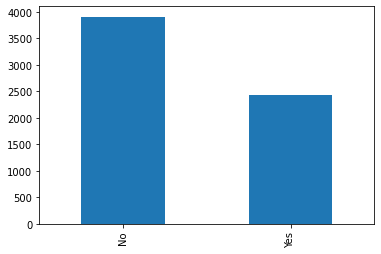

In [ ]:
df['FilmSubscription'].value_counts().plot.bar()
plt.show()

In [ ]:
df['SettlementProcess'].describe()

count           6338
unique             4
top       Electronic
freq            2134
Name: SettlementProcess, dtype: object

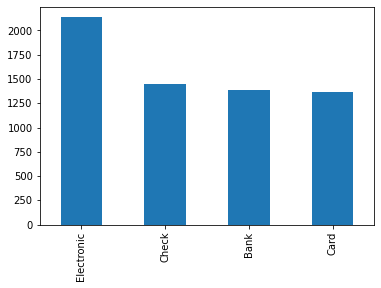

In [ ]:
df['SettlementProcess'].value_counts().plot.bar()
plt.show()

In [ ]:
df['QuarterlyPayment'].describe()

count    6338.000000
mean       64.814490
std        30.191091
min        16.504109
25%        35.645524
50%        70.534085
75%        90.058498
max       120.159190
Name: QuarterlyPayment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


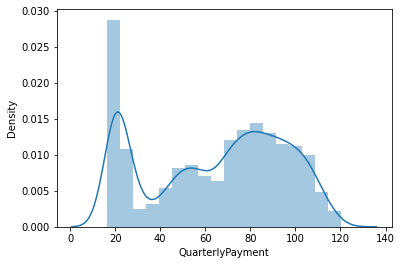

In [ ]:
sns.distplot(df['QuarterlyPayment'])
plt.show()

In [ ]:
df['GrandPayment'].describe()

count    6328.000000
mean     2290.544207
std      2265.181098
min        16.297961
25%       401.849530
50%      1407.589119
75%      3823.855846
max      8685.848657
Name: GrandPayment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


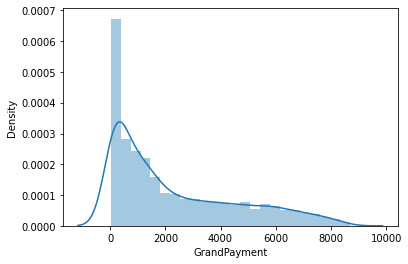

In [ ]:
sns.distplot(df['GrandPayment'])
plt.show()

In [ ]:
num_var = df.dtypes[df.dtypes == 'float64'].index 
num_var = num_var.append(df.dtypes[df.dtypes == 'int64'].index)

In [ ]:
cat_var = df.dtypes[df.dtypes == 'object'].index

In [ ]:
cat_var = cat_var.drop(['CustomerAttrition','ID'])

In [ ]:
cat_var

Index(['sex', 'Aged', 'Married', 'TotalDependents', 'MobileService',
       '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess'],
      dtype='object')

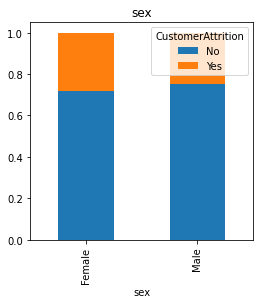

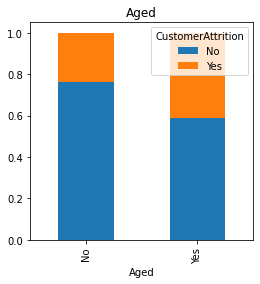

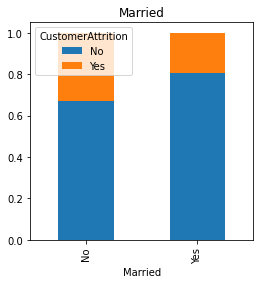

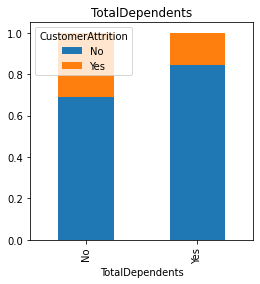

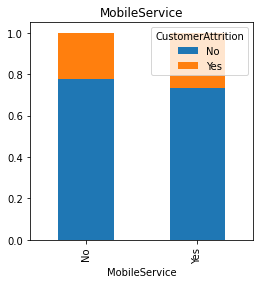

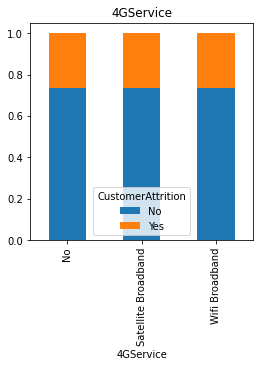

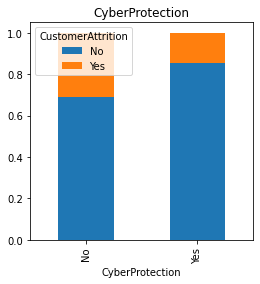

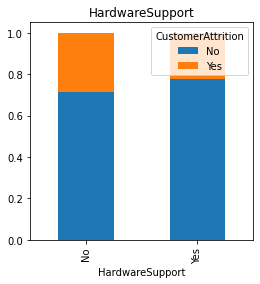

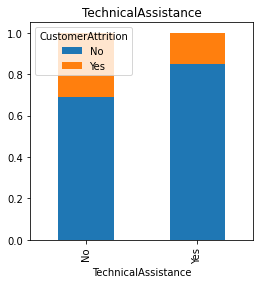

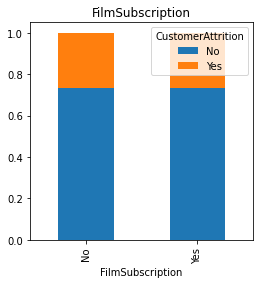

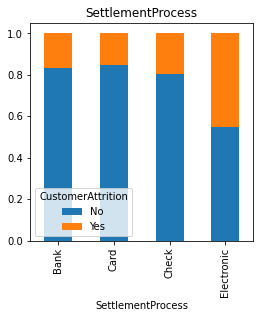

In [ ]:
for i in cat_var:
    tab_var = pd.crosstab(df[i],df['CustomerAttrition'])
    tab_var.div(tab_var.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True,figsize = (4,4))
    plt.title(i)
    plt.show()  

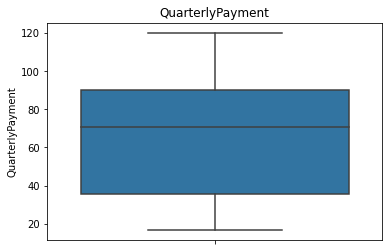

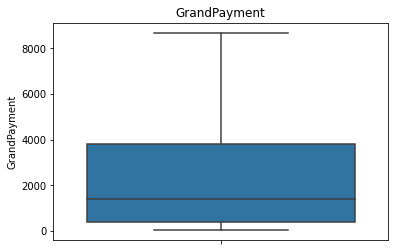

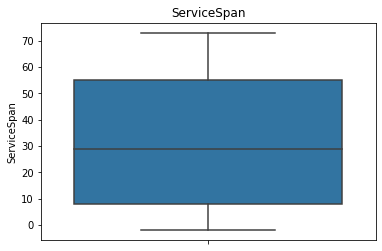

In [ ]:
for i in num_var:
    sns.boxplot(y = df[i])
    plt.title(i)
    plt.show()

In [ ]:
df['GrandPayment'] = df['GrandPayment'].fillna(df['GrandPayment'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6338 non-null   float64
 15  CustomerAttrition    6338 non-null   o

# Encoding Categorical Variables

In [ ]:
df = df.drop('ID',axis = 1)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['ServiceSpan', 'QuarterlyPayment', 'GrandPayment', 'sex_Female',
       'sex_Male', 'Aged_No', 'Aged_Yes', 'Married_No', 'Married_Yes',
       'TotalDependents_No', 'TotalDependents_Yes', 'MobileService_No',
       'MobileService_Yes', '4GService_No', '4GService_Satellite Broadband',
       '4GService_Wifi Broadband', 'CyberProtection_No', 'CyberProtection_Yes',
       'HardwareSupport_No', 'HardwareSupport_Yes', 'TechnicalAssistance_No',
       'TechnicalAssistance_Yes', 'FilmSubscription_No',
       'FilmSubscription_Yes', 'SettlementProcess_Bank',
       'SettlementProcess_Card', 'SettlementProcess_Check',
       'SettlementProcess_Electronic', 'CustomerAttrition_No',
       'CustomerAttrition_Yes'],
      dtype='object')

In [ ]:
df.shape

(6338, 30)

In [ ]:
df

,ServiceSpan,QuarterlyPayment,GrandPayment,sex_Female,sex_Male,Aged_No,Aged_Yes,Married_No,Married_Yes,TotalDependents_No,TotalDependents_Yes,MobileService_No,MobileService_Yes,4GService_No,4GService_Satellite Broadband,4GService_Wifi Broadband,CyberProtection_No,CyberProtection_Yes,HardwareSupport_No,HardwareSupport_Yes,TechnicalAssistance_No,TechnicalAssistance_Yes,FilmSubscription_No,FilmSubscription_Yes,SettlementProcess_Bank,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic,CustomerAttrition_No,CustomerAttrition_Yes
0,48,96.259802,4628.129119,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1
1,45,18.876470,922.085998,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0
2,59,106.016057,6205.891129,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1
3,14,80.108839,1248.655391,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,0
4,25,51.529773,1285.321277,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,3,100.391595,441.914530,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1
6334,-1,44.782165,45.308180,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0
6335,18,35.941713,552.181341,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1
6336,46,94.762984,4563.812326,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
df = df.drop(['sex_Female','Aged_No','Married_No','TotalDependents_No','MobileService_No','4GService_No','CyberProtection_No','HardwareSupport_No','TechnicalAssistance_No','FilmSubscription_No','SettlementProcess_Bank','CustomerAttrition_No'],axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ServiceSpan                    6338 non-null   int64  
 1   QuarterlyPayment               6338 non-null   float64
 2   GrandPayment                   6338 non-null   float64
 3   sex_Male                       6338 non-null   uint8  
 4   Aged_Yes                       6338 non-null   uint8  
 5   Married_Yes                    6338 non-null   uint8  
 6   TotalDependents_Yes            6338 non-null   uint8  
 7   MobileService_Yes              6338 non-null   uint8  
 8   4GService_Satellite Broadband  6338 non-null   uint8  
 9   4GService_Wifi Broadband       6338 non-null   uint8  
 10  CyberProtection_Yes            6338 non-null   uint8  
 11  HardwareSupport_Yes            6338 non-null   uint8  
 12  TechnicalAssistance_Yes        6338 non-null   u

# Test Set

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_test_copy = df_test.copy()
df_test.head()

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
0,WMORTPCG3HTIPEFSGUFY,Male,No,No,No,8,Yes,Wifi Broadband,No,No,No,Yes,Check,21.299937,151.092519
1,GBLPEA16C3KGBO57KEFO,Female,No,No,No,26,Yes,Satellite Broadband,No,Yes,No,Yes,Check,56.609623,1553.276979
2,IDCQS0CO5P29AMKY3LO1,Male,No,No,No,66,Yes,Satellite Broadband,No,No,No,Yes,Card,25.167690,1684.262416
3,1IY29SDITYU6IFZ4KJB0,Female,Yes,No,No,31,Yes,Satellite Broadband,No,No,Yes,Yes,Bank,55.560968,1829.874462
4,T5XMW5B0YPCONH30WJD2,Female,No,Yes,Yes,21,Yes,Satellite Broadband,No,No,No,No,Bank,20.070002,489.818170


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   705 non-null    object 
 1   sex                  705 non-null    object 
 2   Aged                 705 non-null    object 
 3   Married              705 non-null    object 
 4   TotalDependents      705 non-null    object 
 5   ServiceSpan          705 non-null    int64  
 6   MobileService        705 non-null    object 
 7   4GService            705 non-null    object 
 8   CyberProtection      705 non-null    object 
 9   HardwareSupport      705 non-null    object 
 10  TechnicalAssistance  705 non-null    object 
 11  FilmSubscription     705 non-null    object 
 12  SettlementProcess    705 non-null    object 
 13  QuarterlyPayment     705 non-null    float64
 14  GrandPayment         704 non-null    float64
dtypes: float64(2), int64(1), object(12)
memo

In [ ]:
df_test['GrandPayment'] = df_test['GrandPayment'].fillna(df['GrandPayment'].mean())

In [ ]:
df_test.isnull().sum()

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           0
dtype: int64

In [ ]:
df_test = df_test.drop('ID',axis = 1)

In [ ]:
df_test = pd.get_dummies(df_test)

In [ ]:
df_test.columns

Index(['ServiceSpan', 'QuarterlyPayment', 'GrandPayment', 'sex_Female',
       'sex_Male', 'Aged_No', 'Aged_Yes', 'Married_No', 'Married_Yes',
       'TotalDependents_No', 'TotalDependents_Yes', 'MobileService_No',
       'MobileService_Yes', '4GService_No', '4GService_Satellite Broadband',
       '4GService_Wifi Broadband', 'CyberProtection_No', 'CyberProtection_Yes',
       'HardwareSupport_No', 'HardwareSupport_Yes', 'TechnicalAssistance_No',
       'TechnicalAssistance_Yes', 'FilmSubscription_No',
       'FilmSubscription_Yes', 'SettlementProcess_Bank',
       'SettlementProcess_Card', 'SettlementProcess_Check',
       'SettlementProcess_Electronic'],
      dtype='object')

In [ ]:
df_test = df_test.drop(['sex_Female','Aged_No','Married_No','TotalDependents_No','MobileService_No','4GService_No','CyberProtection_No','HardwareSupport_No','TechnicalAssistance_No','FilmSubscription_No','SettlementProcess_Bank'],axis = 1)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ServiceSpan                    705 non-null    int64  
 1   QuarterlyPayment               705 non-null    float64
 2   GrandPayment                   705 non-null    float64
 3   sex_Male                       705 non-null    uint8  
 4   Aged_Yes                       705 non-null    uint8  
 5   Married_Yes                    705 non-null    uint8  
 6   TotalDependents_Yes            705 non-null    uint8  
 7   MobileService_Yes              705 non-null    uint8  
 8   4GService_Satellite Broadband  705 non-null    uint8  
 9   4GService_Wifi Broadband       705 non-null    uint8  
 10  CyberProtection_Yes            705 non-null    uint8  
 11  HardwareSupport_Yes            705 non-null    uint8  
 12  TechnicalAssistance_Yes        705 non-null    uin

# Training the classifier

In [ ]:
y = df['CustomerAttrition_Yes'].values

In [ ]:
X_test = df_test.values
print(X_test.shape)

(705, 17)


In [ ]:
df = df.drop('CustomerAttrition_Yes',axis = 1)

In [ ]:
df.columns

Index(['ServiceSpan', 'QuarterlyPayment', 'GrandPayment', 'sex_Male',
       'Aged_Yes', 'Married_Yes', 'TotalDependents_Yes', 'MobileService_Yes',
       '4GService_Satellite Broadband', '4GService_Wifi Broadband',
       'CyberProtection_Yes', 'HardwareSupport_Yes', 'TechnicalAssistance_Yes',
       'FilmSubscription_Yes', 'SettlementProcess_Card',
       'SettlementProcess_Check', 'SettlementProcess_Electronic'],
      dtype='object')

In [ ]:
X = df.values

### Oversampling using Synthetic Minority Oversampling technique

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smk = SMOTETomek(random_state=42)
#oversample = RandomOverSampler(sampling_strategy=1)
# undersample = RandomUnderSampler(sampling_strategy='majority')
X,y = smk.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X.shape)
print(y.shape)

(8570, 17)
(8570,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X_test = sc_X.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
X = pca.fit_transform(X)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.20245695 0.11961171 0.09653713 0.07249329 0.06631901 0.06026443
 0.05903805 0.05732622 0.05578455 0.04235392 0.0399057  0.0357596
 0.0268872  0.02584925 0.02108477 0.01495275]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(6856, 16)
(1714, 16)
(6856,)
(1714,)


In [ ]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statistics

In [ ]:
#only implement when want to use validation data
#tree = DecisionTreeClassifier()
#tree.fit(X_train,y_train)
#y_pred = tree.predict(X_val)
#y_pred_train = tree.predict(X_train)

# classifier = RandomForestClassifier(n_estimators = 150,criterion = 'entropy',random_state = 0,max_depth= 7)
# classifier.fit(X_train,y_train)
# y_pred = classifier.predict(X_val)
# y_pred_train = classifier.predict(X_train)
# y_prediction_test = classifier.predict(X_test)

#SVM Classifier
# svclassifier = SVC(kernel='rbf')
# svclassifier.fit(X_train, y_train)
# y_pred = svclassifier.predict(X_val)
# y_pred_train = svclassifier.predict(X_train)

#xgboost
# xgb = XGBClassifier()
# xgb.fit(X_train,y_train)
# y_pred_train = xgb.predict(X_train)
# y_pred = xgb.predict(X_val)
# y_prediction_test = xgb.predict(X_test)

In [ ]:
#actual Training for submission
xgb1 = XGBClassifier()
# xgb1.fit(X,y)
# y_prediction_test = xgb1.predict(X_test)
#classifier1 = RandomForestClassifier(n_estimators = 150,criterion = 'entropy',random_state = 0,max_depth = 7)
# classifier1.fit(X,y)
# y_prediction_test = classifier1.predict(X_test)
lgb = LGBMClassifier(learning_rate=0.1,max_depth=2,n_estimators=140,n_jobs=-1)
gbc = GradientBoostingClassifier()
#SVM Classifier
# svclassifier1 = SVC(kernel='rbf')
# svclassifier1.fit(X, y)
# y_prediction_test = svclassifier1.predict(X_test)
# from sklearn.linear_model import LogisticRegression
# regressor = LogisticRegression(random_state = 0)

#Voting Classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('Xgboost',xgb1),('lgbc',lgb),('GBC',gbc)],voting = 'hard')

#Cross validation
l = []
from sklearn.model_selection import cross_val_score
for k in range(5,21):
  accuracy_vector = cross_val_score(estimator = voting_clf,X = X,y = y,cv = k)
  # print('for k = ',k,'accuracy',accuracy_vector)
  print('mean accuracy for k =',k,'is:', accuracy_vector.mean())
  print('standard deviation for k =',k,'is:',accuracy_vector.std())
  l.append(accuracy_vector.mean())
print(statistics.mean(l))
# gbc.fit(X,y)
# lgb.fit(X,y)
voting_clf.fit(X,y)
y_pred_X = voting_clf.predict(X)
y_prediction_test = voting_clf.predict(X_test)

mean accuracy for k = 5 is: 0.8159859976662778
standard deviation for k = 5 is: 0.0579433213926668
mean accuracy for k = 6 is: 0.8197381471832959
standard deviation for k = 6 is: 0.055404814401480866
mean accuracy for k = 7 is: 0.8200888926999371
standard deviation for k = 7 is: 0.05349176107687961
mean accuracy for k = 8 is: 0.8200890897403738
standard deviation for k = 8 is: 0.056392338300348066
mean accuracy for k = 9 is: 0.8224225331965596
standard deviation for k = 9 is: 0.05513073297415484
mean accuracy for k = 10 is: 0.8263710618436406
standard deviation for k = 10 is: 0.055030339367043685
mean accuracy for k = 11 is: 0.8235808265333296
standard deviation for k = 11 is: 0.05550424130696832
mean accuracy for k = 12 is: 0.8224249606602548
standard deviation for k = 12 is: 0.05700820621718716
mean accuracy for k = 13 is: 0.8226673175079853
standard deviation for k = 13 is: 0.05581926479480077
mean accuracy for k = 14 is: 0.8237072425490044
standard deviation for k = 14 is: 0.059618

In [ ]:
lgb

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=2,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=140, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
voting_clf.estimators

[('Xgboost',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, gamma=0,
                learning_rate=0.1, max_delta_step=0, max_depth=3,
                min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
                nthread=None, objective='binary:logistic', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                silent=None, subsample=1, verbosity=1)),
 ('lgbc',
  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                 importance_type='split', learning_rate=0.1, max_depth=2,
                 min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                 n_estimators=140, n_jobs=-1, num_leaves=31, objective=None,
                 random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                 subsample=1.0, subsample_for_bin=200000, subsample_freq=0)),
 ('GBC',
  Gradient

In [ ]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred_X)
cm

array([[3634,  651],
       [ 634, 3651]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred_X))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4285
           1       0.85      0.85      0.85      4285

    accuracy                           0.85      8570
   macro avg       0.85      0.85      0.85      8570
weighted avg       0.85      0.85      0.85      8570

